In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset using sklearn
from sklearn.datasets import load_boston
data = load_boston()

#Separating data into feature variable X and target variable y respectively
X=data['data']
y=data['target']

#Extracting the names of the features from data
features = data['feature_names']

#Splitting X & y into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=50)

from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

#Checking the model's performance on the test set
print('R2 score for the model on test set =', reg.score(X_test, y_test))

C:\Users\adity\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

R2 score for the model on test set = 0.9026950583596305


# GMM

In [2]:
from sklearn.mixture import GaussianMixture

def f_bic(n):
    gmm = GaussianMixture(n_components=int(n[0][0]),random_state=100)
    gmm.fit(X)
    return np.array([[gmm.bic(X)]])

def f_aic(n):
    gmm = GaussianMixture(n_components=int(n[0][0]),random_state=100)
    gmm.fit(X)
    return np.array([[gmm.aic(X)]])


In [3]:
f_aic([[40]])

array([[-746.49760385]])

num acquisition: 1, time elapsed: 0.35s
num acquisition: 2, time elapsed: 0.71s
num acquisition: 3, time elapsed: 1.18s
num acquisition: 4, time elapsed: 1.50s
num acquisition: 5, time elapsed: 2.18s
num acquisition: 6, time elapsed: 2.63s
num acquisition: 7, time elapsed: 3.01s
num acquisition: 8, time elapsed: 3.32s
num acquisition: 9, time elapsed: 3.92s
num acquisition: 10, time elapsed: 4.40s
num acquisition: 11, time elapsed: 4.77s
num acquisition: 12, time elapsed: 5.10s
num acquisition: 13, time elapsed: 5.55s
num acquisition: 14, time elapsed: 5.98s
num acquisition: 15, time elapsed: 6.46s
num acquisition: 16, time elapsed: 6.82s
num acquisition: 17, time elapsed: 7.37s
num acquisition: 18, time elapsed: 7.66s
num acquisition: 19, time elapsed: 7.98s


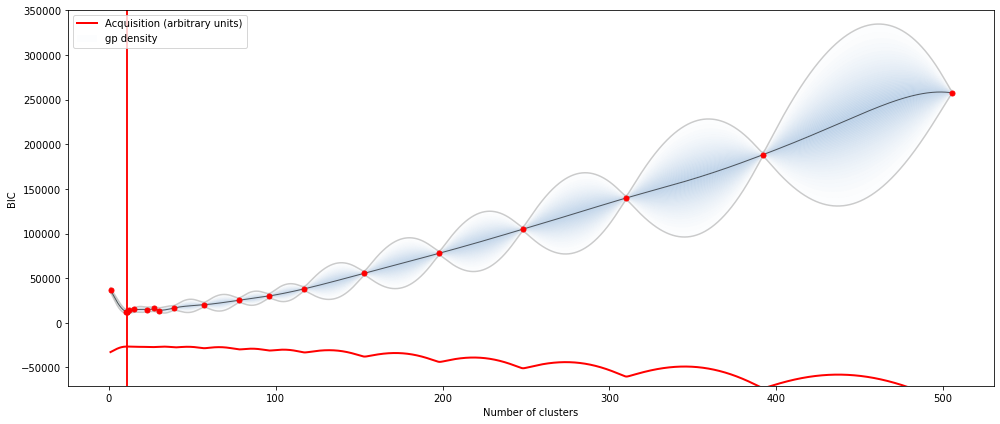

In [4]:
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization
plt.rcParams['figure.figsize'] = 14, 6

bounds = np.array([range(1, X.shape[0])])

X_init = np.array([[10]])
Y_init = f_bic(X_init)

kernel = GPy.kern.Matern32(input_dim=1)
# kernel = GPy.kern.Linear(input_dim=1)
bds = [{'name': 'X', 'type': 'discrete', 'domain': bounds.ravel()}]

optimizer = BayesianOptimization(f=f_bic, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='LCB',
                                 X=X_init,
                                 Y=Y_init,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=False,
                                noise_var=0)

optimizer.run_optimization(max_iter=30,verbosity=True)
optimizer.plot_acquisition(filename="results/gmm_bo_bic.png",label_x="Number of clusters",label_y="BIC")

In [5]:
optimizer.x_opt, optimizer.fx_opt


(array([10]), 11794.914169225842)

num acquisition: 1, time elapsed: 0.66s
num acquisition: 2, time elapsed: 0.88s
num acquisition: 3, time elapsed: 1.43s
num acquisition: 4, time elapsed: 1.92s
num acquisition: 5, time elapsed: 2.49s
num acquisition: 6, time elapsed: 2.85s
num acquisition: 7, time elapsed: 3.33s
num acquisition: 8, time elapsed: 3.79s
num acquisition: 9, time elapsed: 4.25s
num acquisition: 10, time elapsed: 4.66s
num acquisition: 11, time elapsed: 5.23s
num acquisition: 12, time elapsed: 5.76s
num acquisition: 13, time elapsed: 6.21s
num acquisition: 14, time elapsed: 6.78s
num acquisition: 15, time elapsed: 7.26s
num acquisition: 16, time elapsed: 7.88s
num acquisition: 17, time elapsed: 8.51s
num acquisition: 18, time elapsed: 8.96s
num acquisition: 19, time elapsed: 9.42s
num acquisition: 20, time elapsed: 9.95s
num acquisition: 21, time elapsed: 10.53s
num acquisition: 22, time elapsed: 11.07s
num acquisition: 23, time elapsed: 11.53s
num acquisition: 24, time elapsed: 12.33s
num acquisition: 25, 

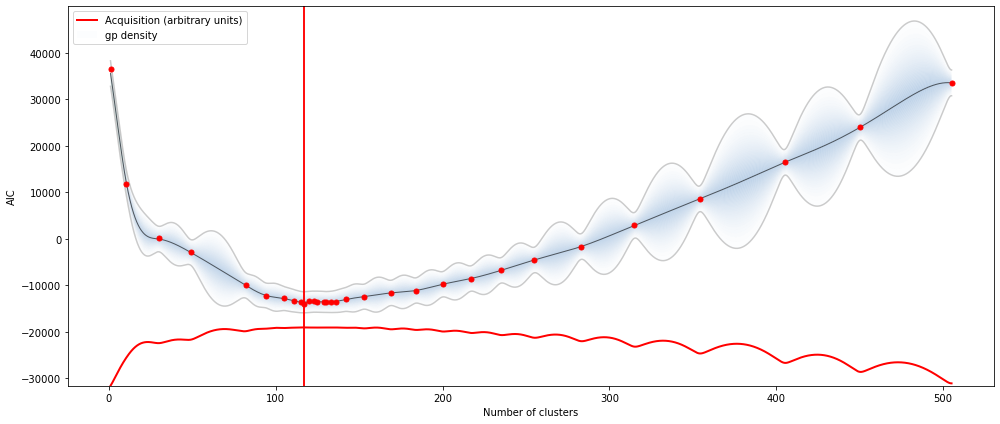

In [6]:
optimizer = BayesianOptimization(f=f_aic, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='LCB',
                                 X=X_init,
                                 Y=Y_init,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=False,
                                noise_var=0)

optimizer.run_optimization(max_iter=30,verbosity=True)
optimizer.plot_acquisition(filename="results/gmm_bo_aic.png",label_x="Number of clusters",label_y="AIC")

In [7]:
optimizer.x_opt, optimizer.fx_opt

(array([117]), -13946.371144896046)